# Chicago Crimes Data Prediction

* Data Source : https://data.cityofchicago.org/ 


---

\

 ### **Objective** :  To Predict the kind of crimes being happend in the state of Chicago frequently so that it will be usefull for the police department to minimise the Crime






**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the dataset**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Crimes_-_2001_to_Present.csv", low_memory=False, chunksize=100000)

In [ ]:
li = []
for i in data:
    li.append(i)
    break
    
df = pd.concat(li,sort=False)

In [ ]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,-87.670000,"(41.815117282, -87.669999562)",29.0,14924.0,59.0,706.0,3.0,37.0,23.0,108.0
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,-87.765400,"(41.895080471, -87.765400451)",4.0,4299.0,26.0,562.0,45.0,5.0,25.0,67.0
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,-87.716650,"(41.937405765, -87.716649687)",15.0,21538.0,22.0,216.0,12.0,39.0,7.0,168.0
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,-87.755121,"(41.881903443, -87.755121152)",11.0,22216.0,26.0,696.0,23.0,32.0,25.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11223452,JA550814,12/15/2017 05:39:27 PM,073XX S UNIVERSITY AVE,2022,NARCOTICS,POSS: COCAINE,RESIDENCE,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,10215383,HY401570,08/29/2015 02:15:00 AM,0000X W ELM ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,-87.629210,"(41.90316534, -87.629210442)",22.0,14926.0,37.0,230.0,11.0,54.0,14.0,197.0
99997,10215384,HY401563,08/29/2015 02:10:00 AM,012XX W SUNNYSIDE AVE,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False,...,-87.661469,"(41.963517399, -87.661469059)",37.0,22616.0,31.0,611.0,39.0,15.0,5.0,6.0
99998,10215385,HY392317,08/15/2015 12:00:00 AM,010XX W SCHOOL ST,0820,THEFT,$500 AND UNDER,SIDEWALK,False,False,...,-87.654552,"(41.941737079, -87.654552346)",38.0,4449.0,57.0,710.0,25.0,22.0,5.0,28.0


**Exploring the dataset**

In [ ]:
df.sample(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
75107,10173404,HY361387,07/30/2015 02:00:00 AM,029XX N BURLING ST,1365,CRIMINAL TRESPASS,TO RESIDENCE,RESIDENCE,False,False,...,-87.647851,"(41.934910819, -87.647851281)",38.0,4449.0,57.0,684.0,25.0,22.0,5.0,30.0
57481,10320061,HY508904,11/12/2015 08:15:00 PM,037XX N KENNETH AVE,0890,THEFT,FROM BUILDING,RESIDENCE PORCH/HALLWAY,False,False,...,-87.739615,"(41.949074494, -87.739615484)",25.0,22618.0,16.0,327.0,50.0,21.0,1.0,25.0
92119,10202024,HY389301,08/19/2015 01:30:00 PM,021XX W SCHILLER ST,0810,THEFT,OVER $500,VEHICLE NON-COMMERCIAL,False,False,...,-87.680922,"(41.907076706, -87.680921635)",16.0,21560.0,25.0,517.0,11.0,4.0,7.0,200.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          100000 non-null  int64  
 1   Case Number                 100000 non-null  object 
 2   Date                        100000 non-null  object 
 3   Block                       100000 non-null  object 
 4   IUCR                        100000 non-null  object 
 5   Primary Type                100000 non-null  object 
 6   Description                 100000 non-null  object 
 7   Location Description        99729 non-null   object 
 8   Arrest                      100000 non-null  bool   
 9   Domestic                    100000 non-null  bool   
 10  Beat                        100000 non-null  int64  
 11  District                    100000 non-null  int64  
 12  Ward                        99996 non-null   float64
 13  Community Area 

In [ ]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
count,1.000000e+05,100000.000000,100000.000000,99996.000000,99996.000000,9.777700e+04,9.777700e+04,100000.000000,97777.000000,97777.000000,97544.000000,97777.000000,97588.000000,97611.000000,97590.000000,97588.000000,97604.000000,97605.000000
mean,1.028424e+07,1142.530530,11.196520,22.882855,37.362625,1.164599e+06,1.885788e+06,2015.063380,41.842199,-87.671505,27.559307,19116.466337,38.956880,382.639385,25.726048,31.876460,15.033718,149.956877
std,2.706294e+05,693.511392,6.928926,13.907918,21.424580,1.635850e+04,3.113066e+04,0.696784,0.085619,0.059546,15.162710,5697.806133,19.860325,231.566427,14.527373,19.044592,6.424237,78.155301
min,1.744168e+06,111.000000,1.000000,1.000000,1.000000,1.094231e+06,1.813910e+06,2001.000000,41.644604,-87.928909,1.000000,2733.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.019593e+07,612.000000,6.000000,10.000000,23.000000,1.152709e+06,1.858858e+06,2015.000000,41.768105,-87.714676,15.000000,21184.000000,25.000000,176.000000,13.000000,16.000000,10.000000,84.000000
50%,1.024938e+07,1023.000000,10.000000,23.000000,32.000000,1.166249e+06,1.891625e+06,2015.000000,41.858441,-87.665413,28.000000,21560.000000,37.000000,381.000000,26.000000,30.000000,16.000000,152.000000
75%,1.029298e+07,1711.000000,17.000000,34.000000,56.000000,1.176406e+06,1.908601e+06,2015.000000,41.904912,-87.627930,41.000000,22216.000000,57.000000,580.000000,37.000000,52.000000,20.000000,221.000000
max,1.281295e+07,2535.000000,31.000000,50.000000,77.000000,1.205111e+06,1.951507e+06,2022.000000,42.022548,-87.524615,53.000000,26633.000000,77.000000,801.000000,50.000000,61.000000,25.000000,277.000000


In [ ]:
df.shape

(100000, 30)

In [ ]:
df.nunique()

ID                            100000
Case Number                   100000
Date                           45680
Block                          22313
IUCR                             307
Primary Type                      33
Description                      322
Location Description             119
Arrest                             2
Domestic                           2
Beat                             274
District                          23
Ward                              50
Community Area                    77
FBI Code                          25
X Coordinate                   36863
Y Coordinate                   45844
Year                              21
Updated On                       562
Latitude                       64181
Longitude                      64172
Location                       64185
Historical Wards 2003-2015        51
Zip Codes                         77
Community Areas                   77
Census Tracts                    800
Wards                             50
B

**Checking the null values in dataset**

In [ ]:
df.isnull().sum().sum()

30487

In [ ]:
 df.isnull().sum()

ID                               0
Case Number                      0
Date                             0
Block                            0
IUCR                             0
Primary Type                     0
Description                      0
Location Description           271
Arrest                           0
Domestic                         0
Beat                             0
District                         0
Ward                             4
Community Area                   4
FBI Code                         0
X Coordinate                  2223
Y Coordinate                  2223
Year                             0
Updated On                       0
Latitude                      2223
Longitude                     2223
Location                      2223
Historical Wards 2003-2015    2456
Zip Codes                     2223
Community Areas               2412
Census Tracts                 2389
Wards                         2410
Boundaries - ZIP Codes        2412
Police Districts    

**Plotting graph for null values**

Text(0.5, 1.0, 'Missing values in dataset')

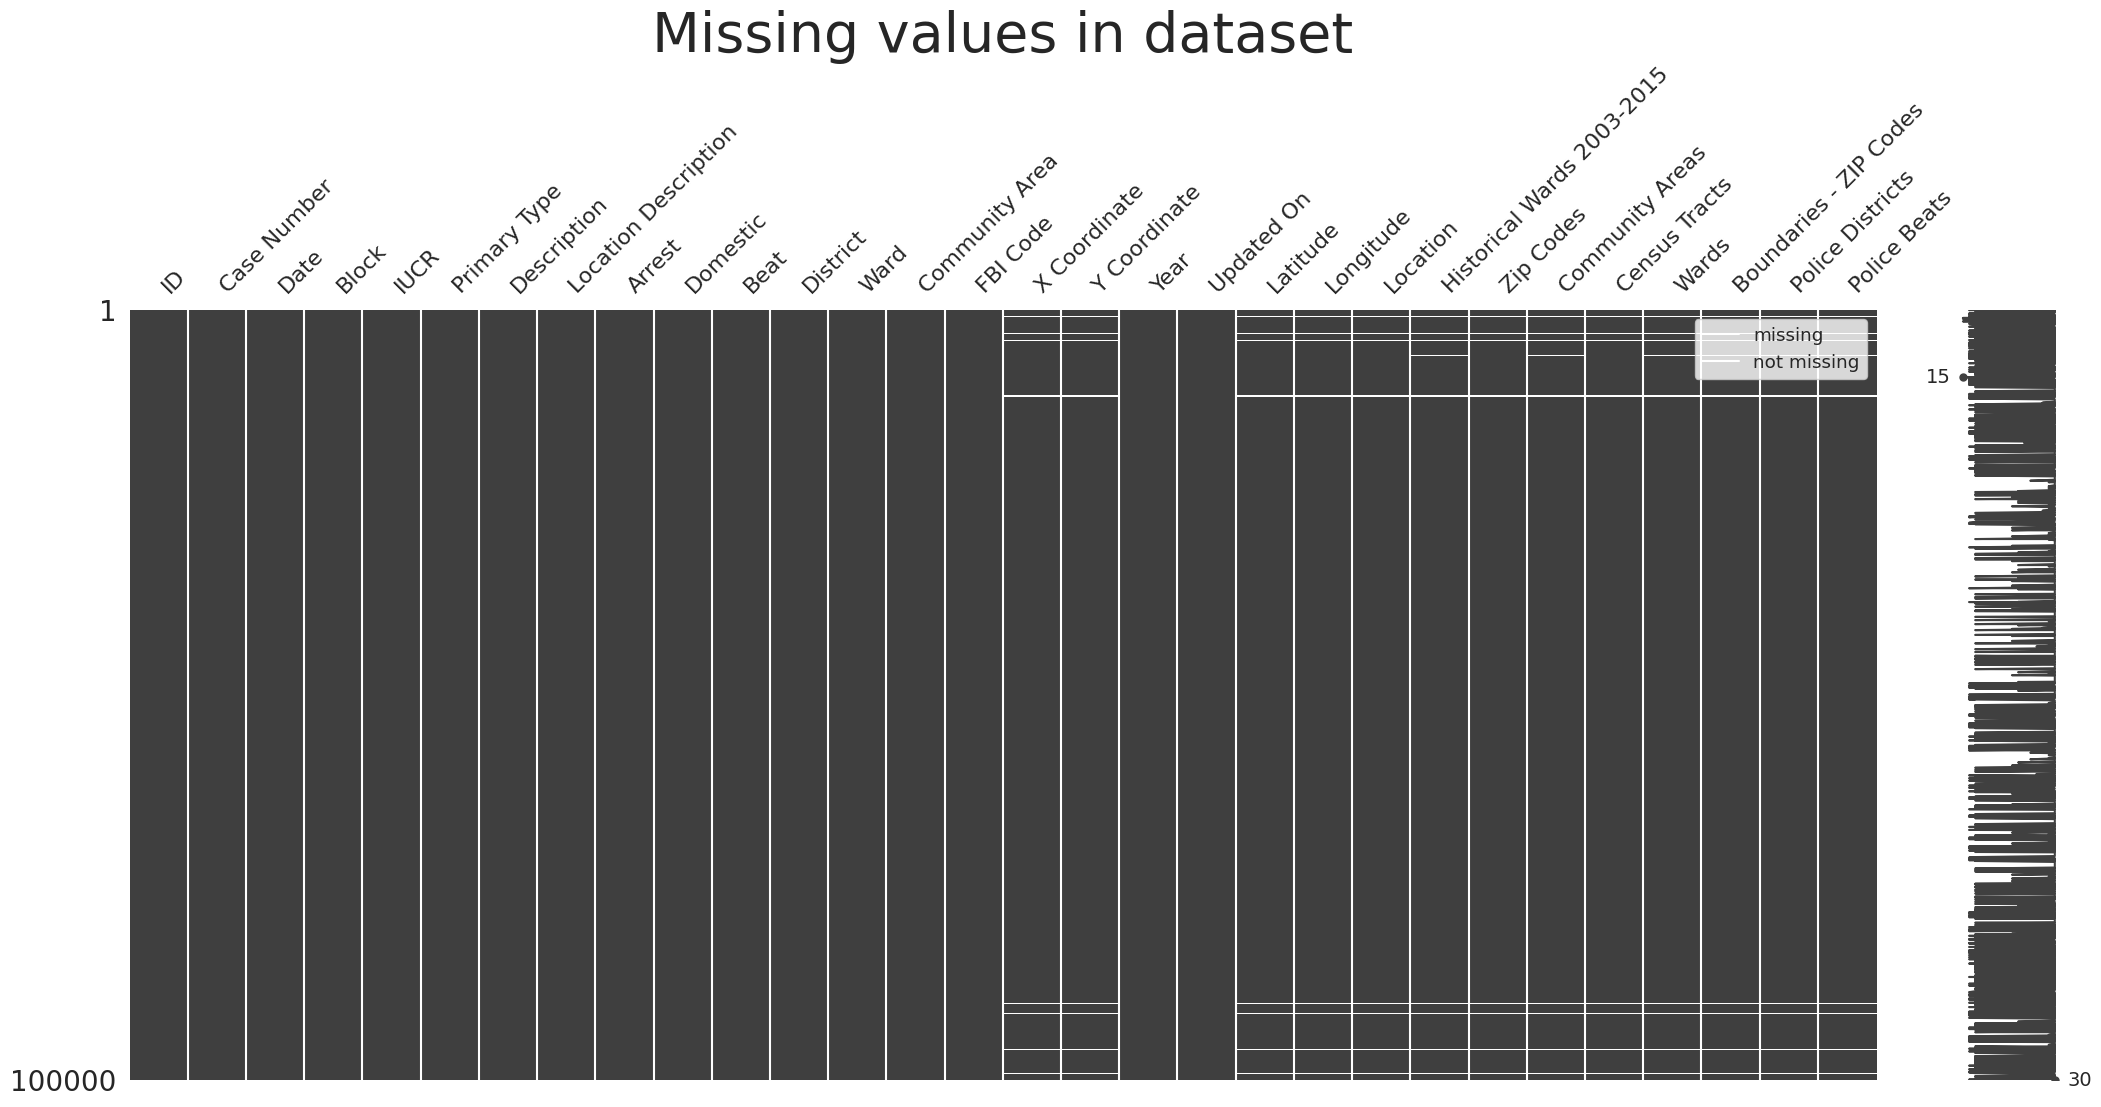

In [ ]:
msno.matrix(df)
plt.legend(['missing','not missing'])
plt.title("Missing values in dataset",size = 40)

**Plotting graph for column of Data**

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Beat'}>,
        <Axes: title={'center': 'District'}>,
        <Axes: title={'center': 'Ward'}>],
       [<Axes: title={'center': 'Community Area'}>,
        <Axes: title={'center': 'X Coordinate'}>,
        <Axes: title={'center': 'Y Coordinate'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Historical Wards 2003-2015'}>,
        <Axes: title={'center': 'Zip Codes'}>],
       [<Axes: title={'center': 'Community Areas'}>,
        <Axes: title={'center': 'Census Tracts'}>,
        <Axes: title={'center': 'Wards'}>,
        <Axes: title={'center': 'Boundaries - ZIP Codes'}>],
       [<Axes: title={'center': 'Police Districts'}>,
        <Axes: title={'center': 'Police Beats'}>, <Axes: >, <Axes: >]],
      dtype=object)

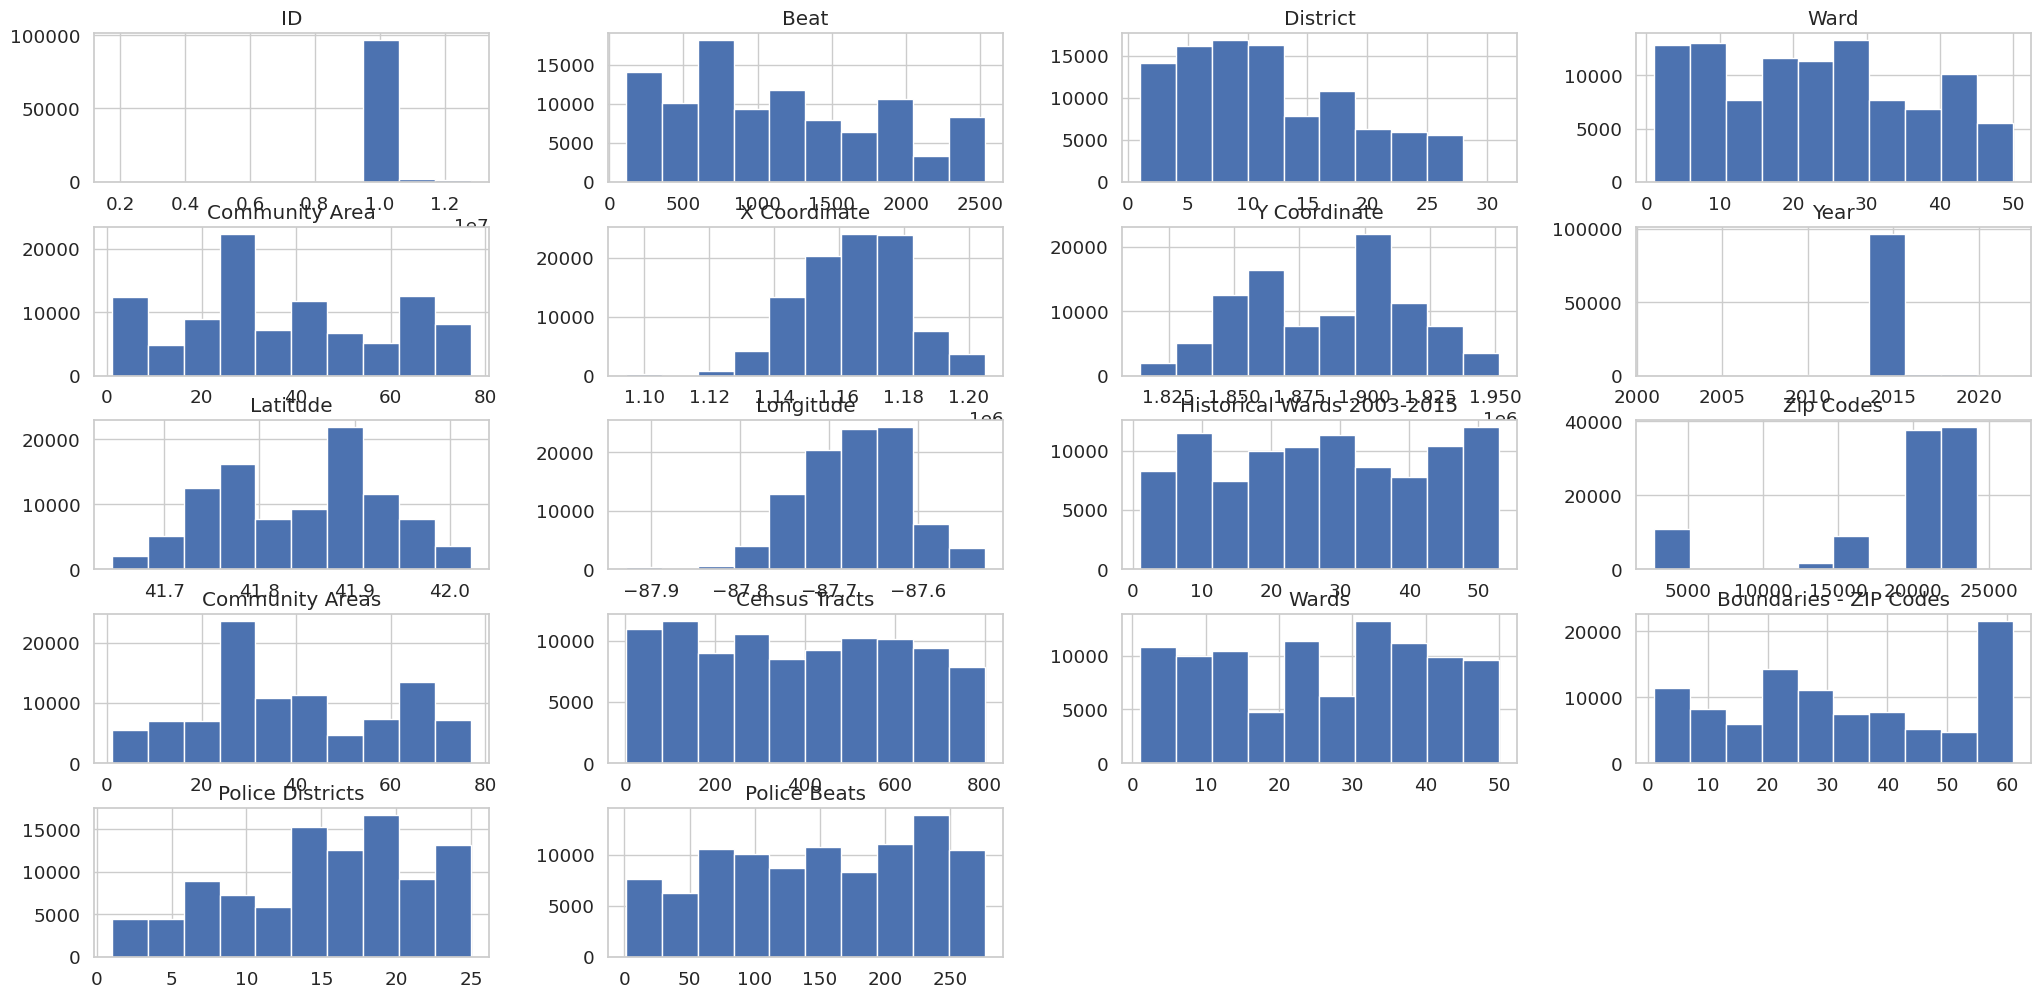

In [ ]:
df.hist(figsize=(25,12))

**Cleaning the dataset**

* Here we are trying to optimise the data by filtering the columns which are required for our analysis

In [ ]:
df_filterted = df[['ID','Case Number','Date','Block','IUCR','Primary Type','Description',
                   'Location Description','Arrest','District','Ward','FBI Code','Year']]

In [ ]:
df_filterted

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,District,Ward,FBI Code,Year
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,9,12.0,08B,2015
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,15,29.0,06,2015
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,6,8.0,06,2018
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,14,35.0,18,2015
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,15,28.0,08A,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11223452,JA550814,12/15/2017 05:39:27 PM,073XX S UNIVERSITY AVE,2022,NARCOTICS,POSS: COCAINE,RESIDENCE,True,3,5.0,18,2017
99996,10215383,HY401570,08/29/2015 02:15:00 AM,0000X W ELM ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,18,42.0,06,2015
99997,10215384,HY401563,08/29/2015 02:10:00 AM,012XX W SUNNYSIDE AVE,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,19,46.0,03,2015
99998,10215385,HY392317,08/15/2015 12:00:00 AM,010XX W SCHOOL ST,0820,THEFT,$500 AND UNDER,SIDEWALK,False,19,44.0,06,2015


In [ ]:
 df_filterted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    100000 non-null  int64  
 1   Case Number           100000 non-null  object 
 2   Date                  100000 non-null  object 
 3   Block                 100000 non-null  object 
 4   IUCR                  100000 non-null  object 
 5   Primary Type          100000 non-null  object 
 6   Description           100000 non-null  object 
 7   Location Description  99729 non-null   object 
 8   Arrest                100000 non-null  bool   
 9   District              100000 non-null  int64  
 10  Ward                  99996 non-null   float64
 11  FBI Code              100000 non-null  object 
 12  Year                  100000 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 9.3+ MB


**Changing the data types for the columns required for our analysis**

In [ ]:
df_filterted = df_filterted.dropna(subset=['Ward'])

In [ ]:
df_filterted["District"]= df_filterted["District"].astype(int)
df_filterted["Ward"]= df_filterted["Ward"].astype(int)


df_filterted["Date"]= df_filterted["Date"].astype('datetime64[ns]')

<ipython-input-149-f04900f0cb41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filterted["District"]= df_filterted["District"].astype(int)
<ipython-input-149-f04900f0cb41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filterted["Ward"]= df_filterted["Ward"].astype(int)
<ipython-input-149-f04900f0cb41>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
df_filterted.sample(4)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,District,Ward,FBI Code,Year
46487,10301476,HY488741,2015-11-04 11:00:00,029XX W POLK ST,0820,THEFT,$500 AND UNDER,"SCHOOL, PUBLIC, BUILDING",False,11,28,06,2015
79219,10180281,HY368485,2015-08-03 15:00:00,072XX S PAULINA ST,0820,THEFT,$500 AND UNDER,OTHER,False,7,17,06,2015
38078,10287236,HY475370,2015-10-24 22:30:00,056XX W ADDISON ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,HOSPITAL BUILDING/GROUNDS,True,16,38,08B,2015
2906,10228735,HY416298,2015-09-08 17:35:00,003XX W CHICAGO AVE,0870,THEFT,POCKET-PICKING,CTA TRAIN,False,18,27,06,2015


In [ ]:
 df_filterted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    99996 non-null  int64         
 1   Case Number           99996 non-null  object        
 2   Date                  99996 non-null  datetime64[ns]
 3   Block                 99996 non-null  object        
 4   IUCR                  99996 non-null  object        
 5   Primary Type          99996 non-null  object        
 6   Description           99996 non-null  object        
 7   Location Description  99725 non-null  object        
 8   Arrest                99996 non-null  bool          
 9   District              99996 non-null  int64         
 10  Ward                  99996 non-null  int64         
 11  FBI Code              99996 non-null  object        
 12  Year                  99996 non-null  int64         
dtypes: bool(1), date

In [ ]:
df_filterted.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    271
Arrest                    0
District                  0
Ward                      0
FBI Code                  0
Year                      0
dtype: int64

**Replacing the Null Values**

In [ ]:
df_filterted['Location Description'].fillna("No Description", inplace=True)

<ipython-input-153-75bb6c98986c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filterted['Location Description'].fillna("No Description", inplace=True)


In [ ]:
df_filterted.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
District                0
Ward                    0
FBI Code                0
Year                    0
dtype: int64

**Extracting day and month form date column** 

In [ ]:
df_filterted['day'] = df_filterted['Date'].dt.day_name()

df_filterted['month'] = df_filterted['Date'].dt.month_name()

<ipython-input-155-5fef406761c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filterted['day'] = df_filterted['Date'].dt.day_name()
<ipython-input-155-5fef406761c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filterted['month'] = df_filterted['Date'].dt.month_name()


In [ ]:
df_filterted.sample(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,District,Ward,FBI Code,Year,day,month
2844,10228497,HY416193,2015-09-08 23:00:00,095XX S JEFFERY AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,4,7,02,2015,Tuesday,September
61500,10326138,HY514621,2015-11-25 11:18:00,008XX N MILWAUKEE AVE,0560,ASSAULT,SIMPLE,STREET,False,12,27,08A,2015,Wednesday,November
23964,10263440,HY451285,2015-10-05 13:00:00,037XX W 62ND PL,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,True,8,13,07,2015,Monday,October


**Visualization of Data**

Text(0.5, 1.0, 'Primary Type of Crimes')

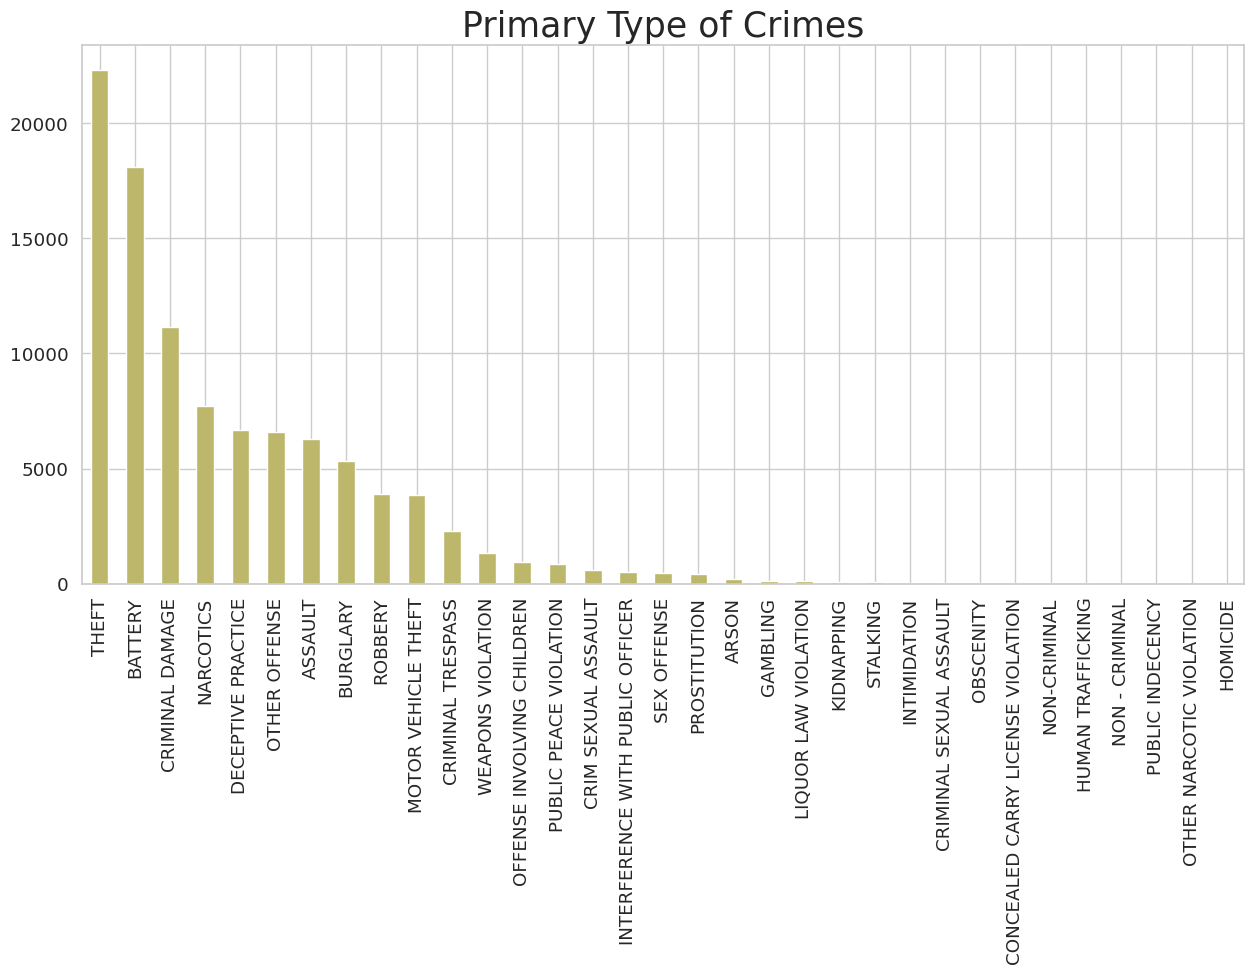

In [ ]:
df_filterted["Primary Type"].value_counts().plot(kind = "bar",figsize=(15,7),color="darkkhaki")
plt.title("Primary Type of Crimes",size = 25)

In [ ]:
crime_counts = df_filterted.groupby('Primary Type').size().sort_values(ascending=False)
top_10_crimes = crime_counts.head(10)
print(top_10_crimes)

Primary Type
THEFT                  22301
BATTERY                18115
CRIMINAL DAMAGE        11167
NARCOTICS               7732
DECEPTIVE PRACTICE      6696
OTHER OFFENSE           6588
ASSAULT                 6272
BURGLARY                5348
ROBBERY                 3908
MOTOR VEHICLE THEFT     3859
dtype: int64


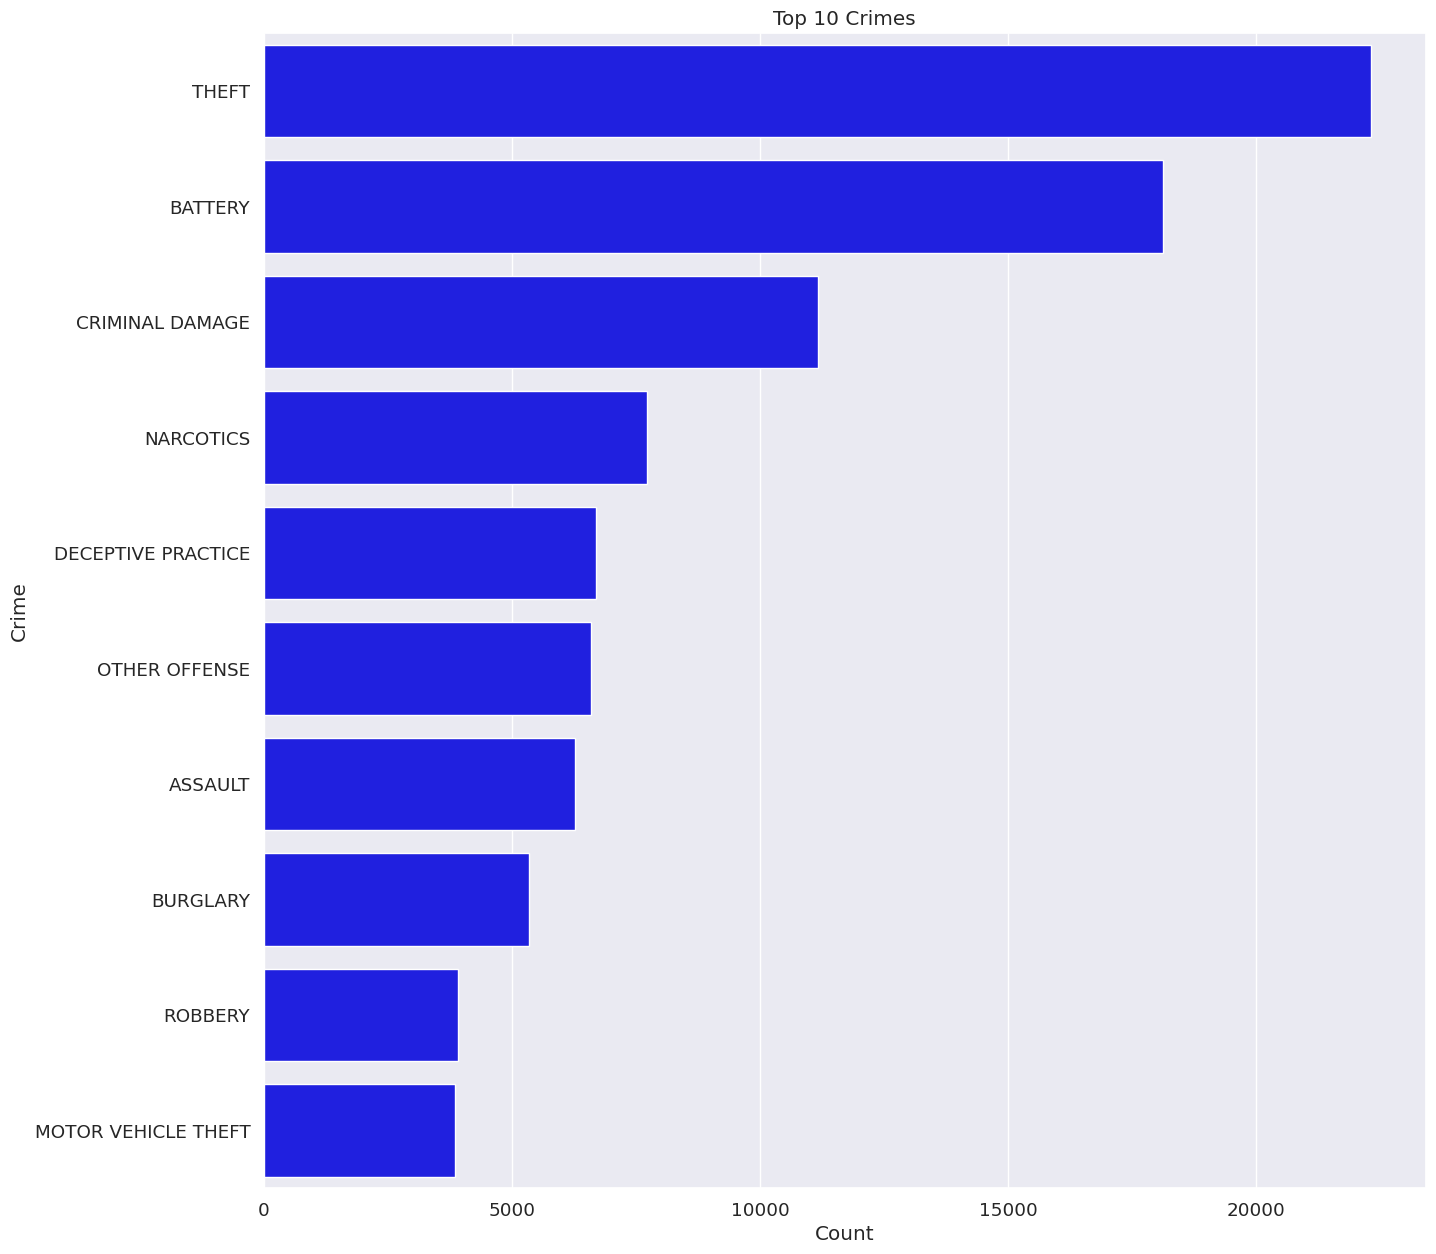

In [ ]:
crime_counts = df_filterted['Primary Type'].value_counts().head(10)
sns.set_style('darkgrid')
ax = sns.barplot(x=crime_counts.values, y=crime_counts.index, color='blue')
ax.set_title('Top 10 Crimes')
ax.set_xlabel('Count')
ax.set_ylabel('Crime')
plt.show()

In [ ]:
df_filterted["Description"].value_counts().sort_values(ascending=False).head(10)

SIMPLE                          10033
$500 AND UNDER                   9387
DOMESTIC BATTERY SIMPLE          9019
TO VEHICLE                       5674
TO PROPERTY                      5046
OVER $500                        4989
FROM BUILDING                    3555
POSS: CANNABIS 30GMS OR LESS     3247
FORCIBLE ENTRY                   3237
RETAIL THEFT                     3218
Name: Description, dtype: int64

Text(0.5, 1.0, 'Crimes Description')

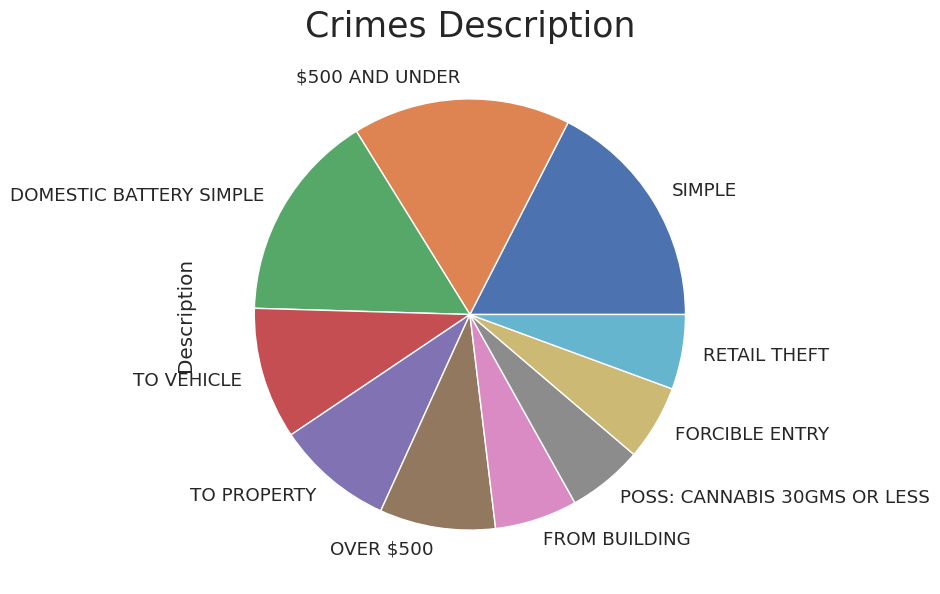

In [ ]:
df_filterted["Description"].value_counts().sort_values(ascending=False).head(10).plot(kind = "pie",figsize=(20,7))
plt.title("Crimes Description",size = 25)

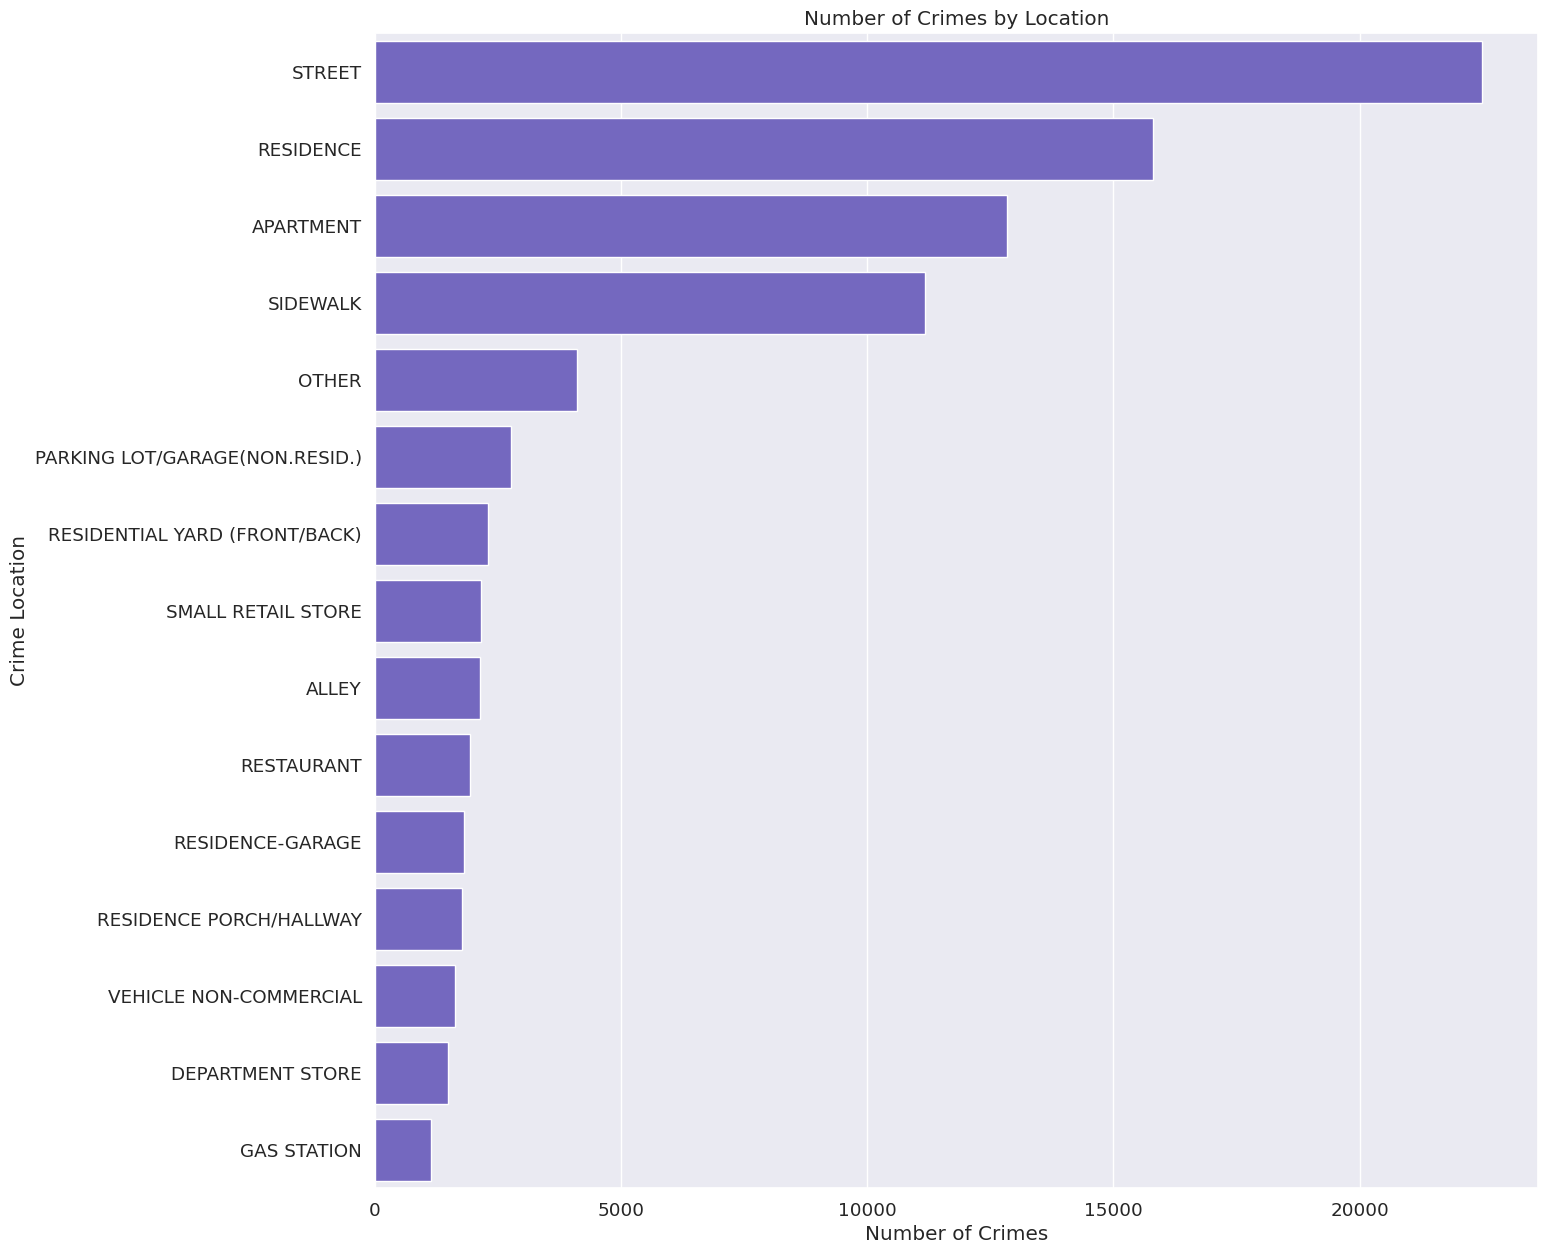

In [ ]:


crime_location_counts = df_filterted['Location Description'].value_counts().head(15)
sns.set_style('darkgrid')
ax = sns.barplot(x=crime_location_counts.values, y=crime_location_counts.index, color='slateblue')
ax.set_title('Number of Crimes by Location')
ax.set_xlabel('Number of Crimes')
ax.set_ylabel('Crime Location')
plt.show()


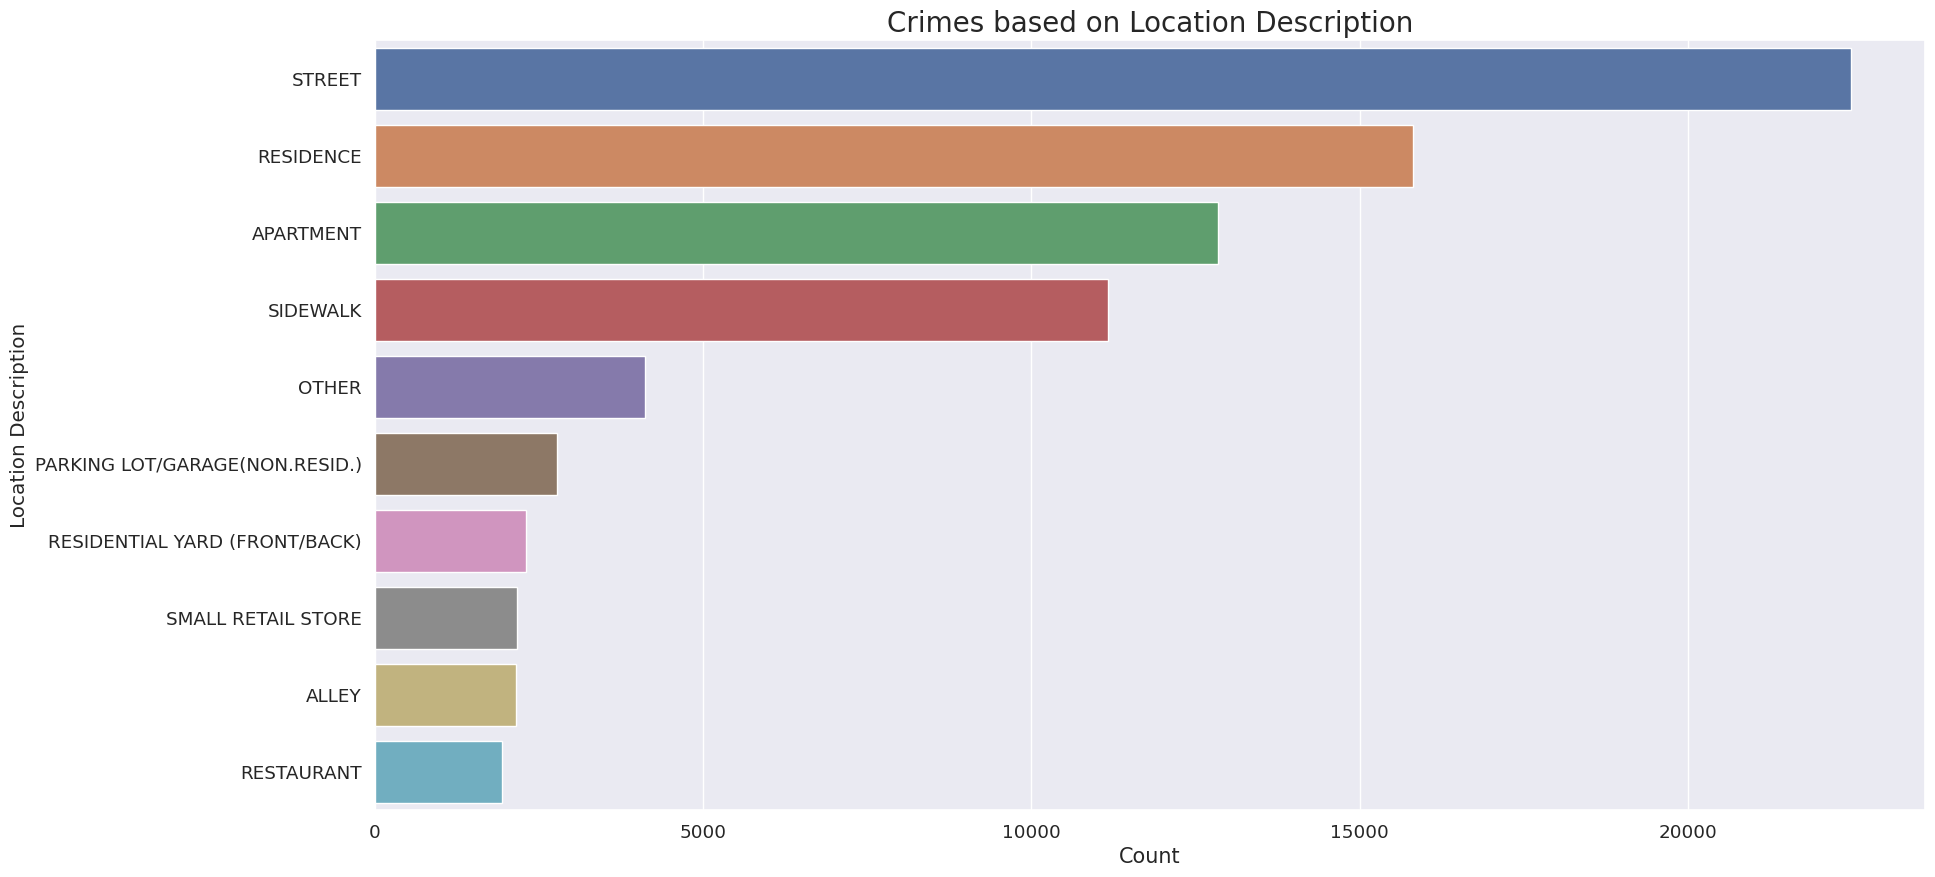

In [ ]:
body = df_filterted["Location Description"].value_counts().index[:10]
plt.figure(figsize=(20,10))
sns.countplot(y = df_filterted["Location Description"],order = body)
plt.xlabel("Count",size =15)
plt.title("Crimes based on Location Description", size = 20)
plt.show()

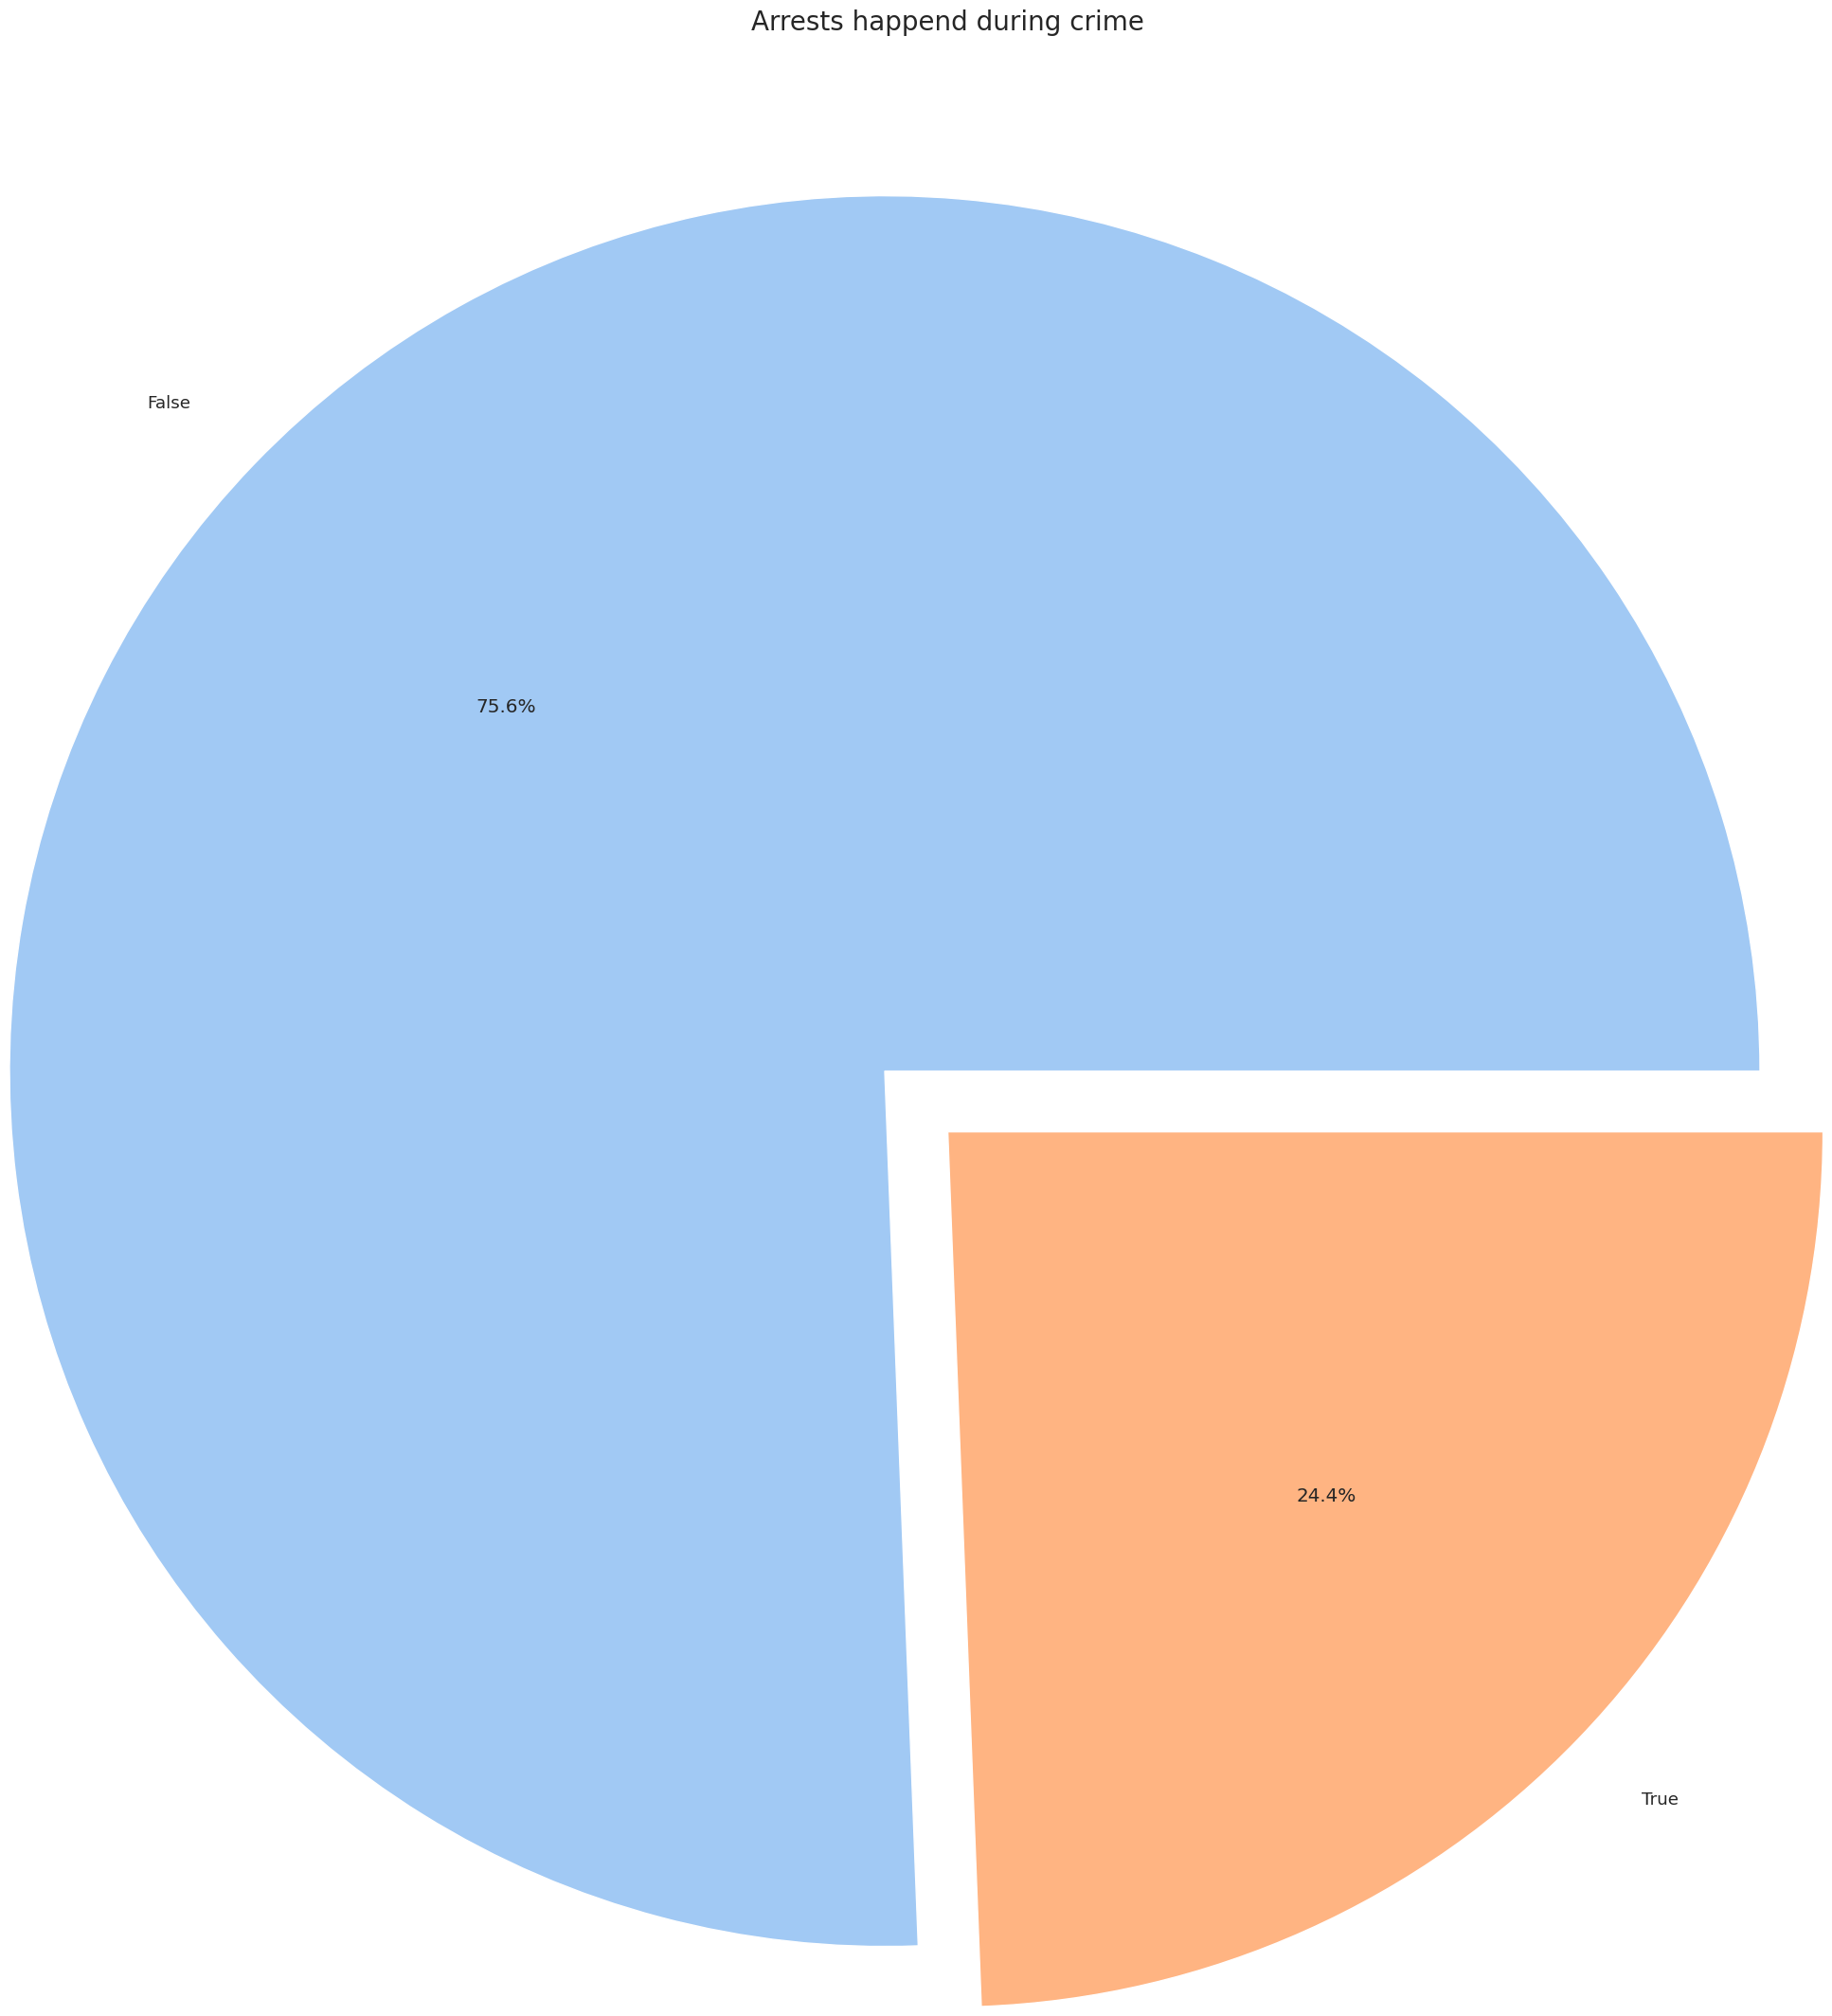

In [ ]:
explode = [0.2,0]
colors = sns.color_palette("pastel")[0:5]
sns.set(font_scale=1.2)
df_filterted['Arrest'].value_counts().plot(kind = "pie",colors=colors,radius= 2,explode = explode,autopct='%1.1f%%')
plt.title("Arrests happend during crime",y = 1.5 ,size = 20)
plt.show()

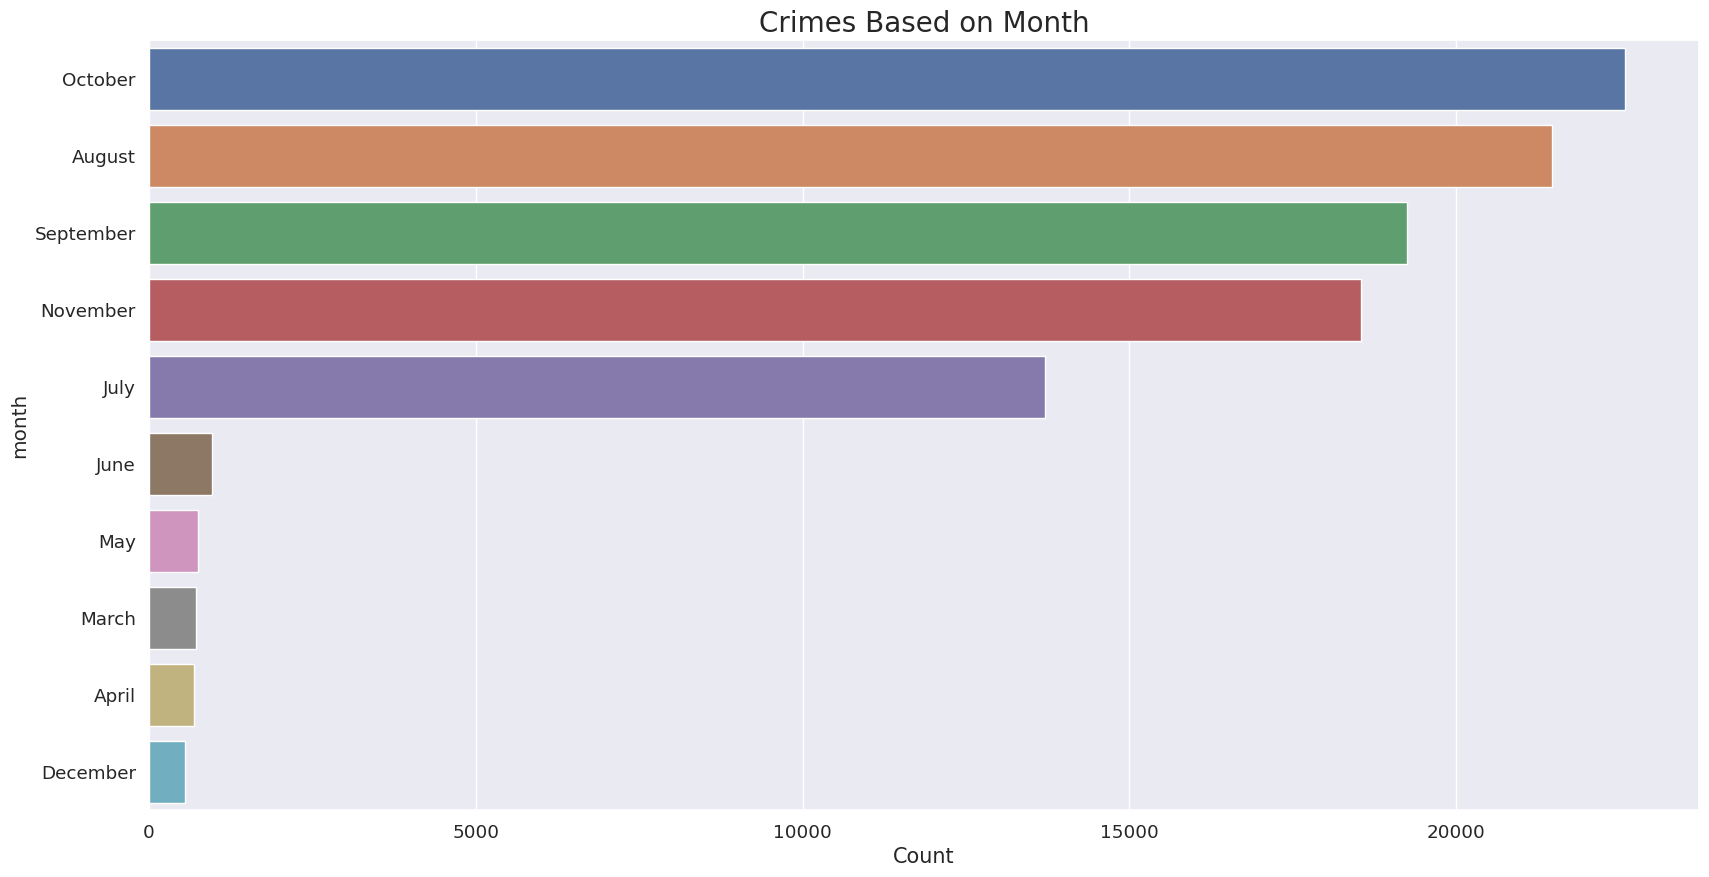

In [ ]:
mn = df_filterted["month"].value_counts().index[:10]
plt.figure(figsize=(20,10))
sns.countplot(y = df_filterted["month"], order = mn)
plt.xlabel("Count",size =15)
plt.title("Crimes Based on Month", size = 20)
plt.show()

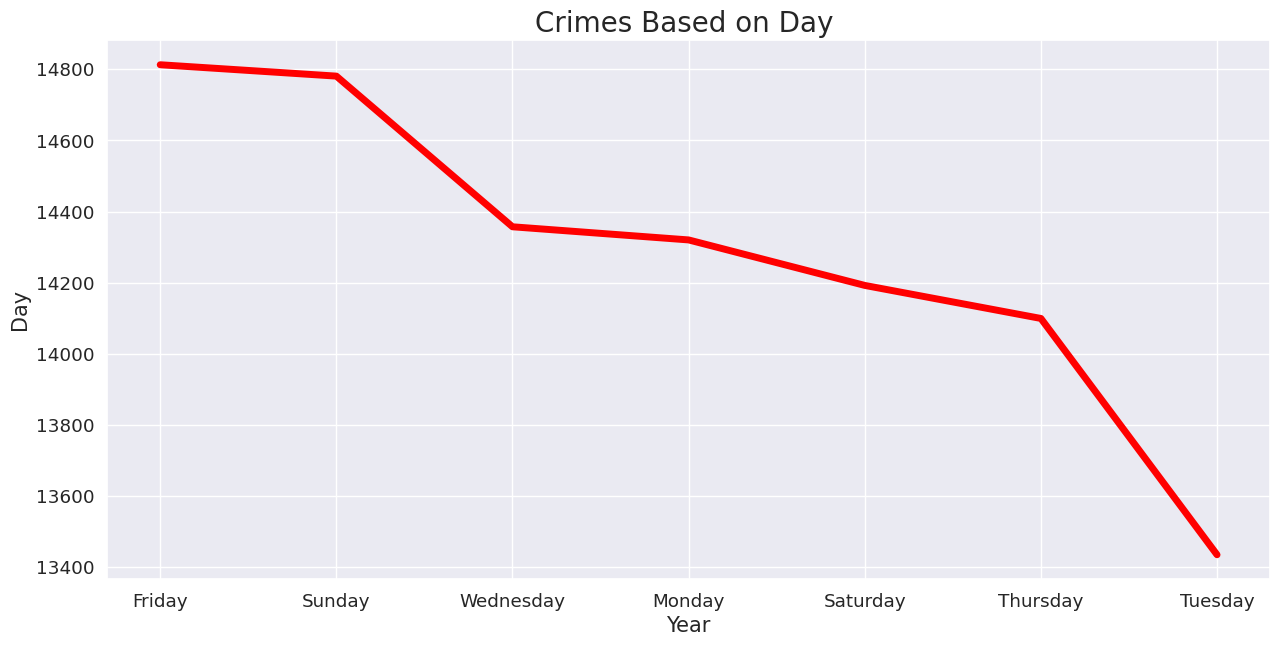

In [ ]:
dy = df_filterted["day"].value_counts().index[:20]
df_filterted["day"].value_counts().plot(kind = "line",figsize=(15,7),linewidth=5,color = "red")
plt.title("Crimes Based on Day ",size = 20)
plt.xlabel("Year",size = 15)
plt.ylabel("Day",size = 15)
plt.show()

**Distribution of crimes by district codes**

<ipython-input-167-cd5d15610856>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filterted["District"], color='magenta')


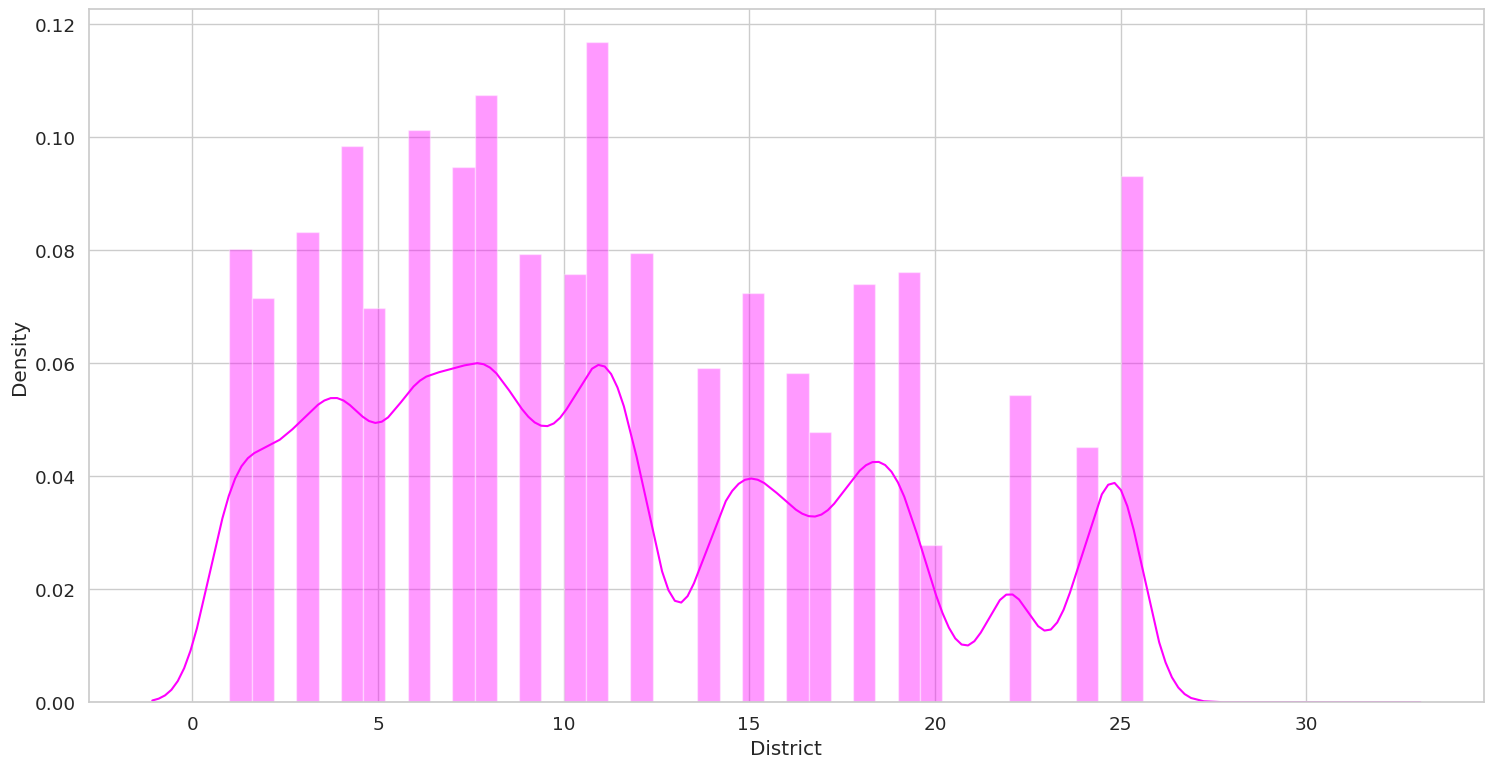

In [ ]:
plt.figure(figsize=(18,9))
sns.set_style("whitegrid")
sns.distplot(df_filterted["District"], color='magenta')
plt.show()

**Building Model for our prediction**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,confusion_matrix,roc_auc_score
from sklearn.metrics import roc_curve, auc,classification_report
from sklearn.model_selection import cross_validate
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix

**Split data into 2 parts, training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
features = [x for x in df_filterted.columns if x != 'Arrest']

X = df_filterted[features]
y = df_filterted['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 79,996
Records in test data: 20,000

Features:
ID
Case Number
Date
Block
IUCR
Primary Type
Description
Location Description
District
Ward
FBI Code
Year
day
month


**Creating Catgorical Pipeline**

In [ ]:
Mylist_Categorical = list(X.select_dtypes(include=['object']).columns)
Mylist_Categorical

Categorical_Pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore'))])
Cat = Categorical_Pipeline.fit_transform(np.array(X_train[Mylist_Categorical]))
Cat.shape

(79996, 101603)

**Creating Processing pipeline**

In [ ]:
Processing_Pipeline = ColumnTransformer(transformers=[('create_dummies',Categorical_Pipeline, Mylist_Categorical)])
Proc_Pipeline = Processing_Pipeline.fit_transform(X_train)

Proc_Pipeline.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

**Logistic Regression Model**

In [ ]:
Logistic_Regression_Model_Pipeline_1 = Pipeline([('processing_pipeline',Processing_Pipeline),
                                     ('model', LogisticRegression(max_iter=1000))])
params = [{'model__C':[0.1,0.3,0.5,1.0,5], 'model__penalty': ['l2']},{'model__penalty':['none']}]
Logistic_regression_model_1 = GridSearchCV(Logistic_Regression_Model_Pipeline_1,param_grid=params,cv=5,scoring='accuracy')
Logistic_regression_model_1 = Logistic_regression_model_1.fit(X_train,y_train)
Logistic_regression_model_1.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

{'model__C': 0.3, 'model__penalty': 'l2'}

In [ ]:
Predict_y_test_lg = Logistic_regression_model_1.best_estimator_.predict(X_test)
Predict_y_train_lg = Logistic_regression_model_1.best_estimator_.predict(X_train)
print(Predict_y_test_lg)
print(Predict_y_train_lg)

[False False False ... False False False]
[False False False ... False False False]


In [ ]:
print(f'Test Score: {Logistic_regression_model_1.score(X_test, y_test): .2%}')

Test Score:  88.98%


In [ ]:
print(f'Train Score: {Logistic_regression_model_1.score(X_train, y_train): .2%}')

Train Score:  90.05%


In [ ]:
confusion_matrix(y_test,Predict_y_test_lg)

array([[14817,   323],
       [ 1882,  2978]])

In [ ]:
print(classification_report(y_test, Logistic_regression_model_1.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

       False       0.89      0.98      0.93     15140
        True       0.90      0.61      0.73      4860

    accuracy                           0.89     20000
   macro avg       0.89      0.80      0.83     20000
weighted avg       0.89      0.89      0.88     20000



In [ ]:
print(f'Accuracy Score:{accuracy_score(y_test,Predict_y_test_lg):.2%}')
print(f'Precision Score:{precision_score(y_test,Predict_y_test_lg,average="macro"):.2%}')
print(f'Recall Score:{recall_score(y_test,Predict_y_test_lg,average="macro"):.2%}')

Accuracy Score:88.98%
Precision Score:89.47%
Recall Score:79.57%


In [ ]:
print(f'F1 Score:{f1_score(y_test,Predict_y_test_lg):.2%}')

F1 Score:72.98%


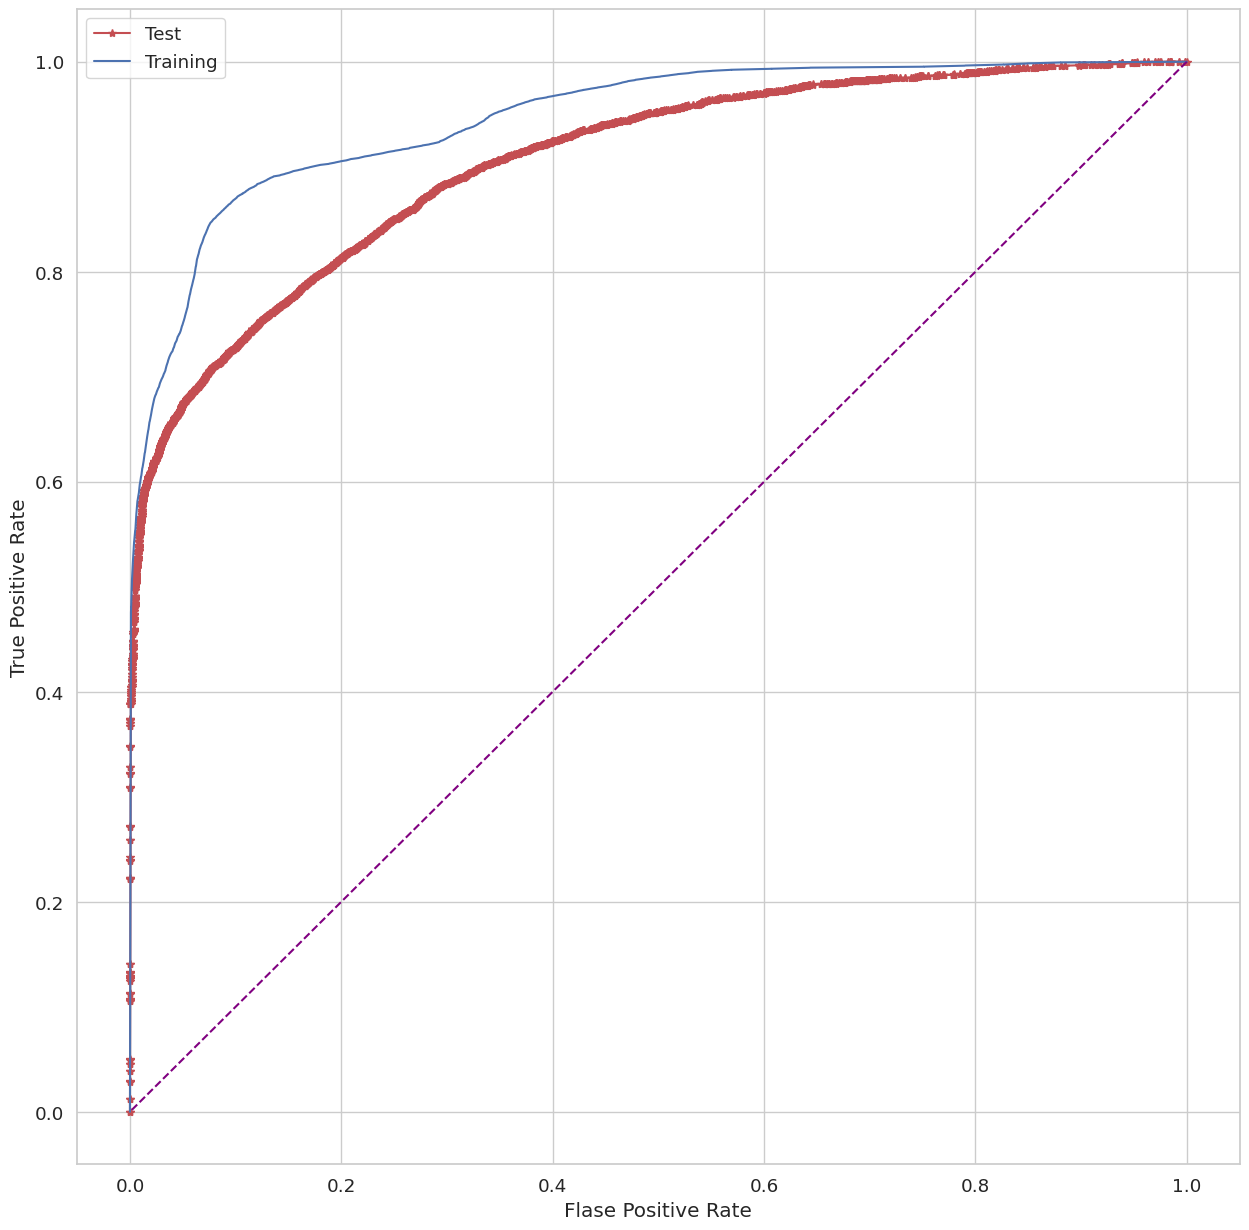

In [ ]:
def generate_probs(X, model=Logistic_regression_model_1.best_estimator_):
  return model.predict_proba(X)[:, 1]
def generate_roc(y,probs):
    fpr, tpr, _ = roc_curve(y, probs,pos_label=True)
    return fpr,tpr
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-*r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([1,0],[1,0], color='purple', linestyle="--")
plt.show()

In [ ]:
print(f' Roc_Accuracy_Score: {roc_auc_score(y_test, generate_probs(X_test)):.2%}')

 Roc_Accuracy_Score: 90.36%


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report




#  convert 'Date' column to datetime format
df_filterted['Date'] = pd.to_datetime(df_filterted['Date'])

# create a new column 'weekday' representing the day of the week (Monday=0, Sunday=6)
df_filterted['weekday'] = df_filterted['Date'].dt.weekday

df_filterted

<ipython-input-182-c2b3a2b034ce>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filterted['Date'] = pd.to_datetime(df_filterted['Date'])
<ipython-input-182-c2b3a2b034ce>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filterted['weekday'] = df_filterted['Date'].dt.weekday


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,District,Ward,FBI Code,Year,day,month,weekday
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,9,12,08B,2015,Saturday,September,5
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,15,29,06,2015,Friday,September,4
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,6,8,06,2018,Saturday,September,5
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,14,35,18,2015,Saturday,September,5
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,15,28,08A,2015,Saturday,September,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11223452,JA550814,2017-12-15 17:39:27,073XX S UNIVERSITY AVE,2022,NARCOTICS,POSS: COCAINE,RESIDENCE,True,3,5,18,2017,Friday,December,4
99996,10215383,HY401570,2015-08-29 02:15:00,0000X W ELM ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,18,42,06,2015,Saturday,August,5
99997,10215384,HY401563,2015-08-29 02:10:00,012XX W SUNNYSIDE AVE,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,19,46,03,2015,Saturday,August,5
99998,10215385,HY392317,2015-08-15 00:00:00,010XX W SCHOOL ST,0820,THEFT,$500 AND UNDER,SIDEWALK,False,19,44,06,2015,Saturday,August,5


In [ ]:
# Drop some crimes that are not important.

# df_filterted.filter((df_filterted['Primary Type']!='STALKING')&
#                              (df_filterted['Primary Type']!='OBSCENITY')&
#                              (df_filterted['Primary Type']!='NON-CRIMINAL (SUBJECT SPECIFIED)')&
#                              (df_filterted['Primary Type']!='GAMBLING')&
#                              (df_filterted['Primary Type']!='NON - CRIMINAL')&
#                              (df_filterted['Primary Type']!='LIQUOR LAW VIOLATION')&
#                              (df_filterted['Primary Type']!='PUBLIC INDECENCY')&
#                              (df_filterted['Primary Type']!='HUMAN TRAFFICKING')&
#                              (df_filterted['Primary Type']!='INTIMIDATION')&
#                              (df_filterted['Primary Type']!='CONCEALED CARRY LICENSE VIOLATION')&
#                              (df_filterted['Primary Type']!='NON-CRIMINAL')&
#                              (df_filterted['Primary Type']!='OTHER NARCOTIC VIOLATION'))
df_filterted.groupby('Primary Type').count()

,ID,Case Number,Date,Block,IUCR,Description,Location Description,Arrest,District,Ward,FBI Code,Year,day,month,weekday
Primary Type,,,,,,,,,,,,,,,
ARSON,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
ASSAULT,6272,6272,6272,6272,6272,6272,6272,6272,6272,6272,6272,6272,6272,6272,6272
BATTERY,18115,18115,18115,18115,18115,18115,18115,18115,18115,18115,18115,18115,18115,18115,18115
BURGLARY,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348
CONCEALED CARRY LICENSE VIOLATION,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
CRIM SEXUAL ASSAULT,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607
CRIMINAL DAMAGE,11167,11167,11167,11167,11167,11167,11167,11167,11167,11167,11167,11167,11167,11167,11167
CRIMINAL SEXUAL ASSAULT,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
CRIMINAL TRESPASS,2277,2277,2277,2277,2277,2277,2277,2277,2277,2277,2277,2277,2277,2277,2277


In [ ]:
df_filterted['Primary Type'].value_counts()

THEFT                                22301
BATTERY                              18115
CRIMINAL DAMAGE                      11167
NARCOTICS                             7732
DECEPTIVE PRACTICE                    6696
OTHER OFFENSE                         6588
ASSAULT                               6272
BURGLARY                              5348
ROBBERY                               3908
MOTOR VEHICLE THEFT                   3859
CRIMINAL TRESPASS                     2277
WEAPONS VIOLATION                     1312
OFFENSE INVOLVING CHILDREN             922
PUBLIC PEACE VIOLATION                 843
CRIM SEXUAL ASSAULT                    607
INTERFERENCE WITH PUBLIC OFFICER       500
SEX OFFENSE                            443
PROSTITUTION                           406
ARSON                                  188
GAMBLING                               124
LIQUOR LAW VIOLATION                   116
KIDNAPPING                              76
STALKING                                57
INTIMIDATIO

In [ ]:
df_filterted=df_filterted.dropna()

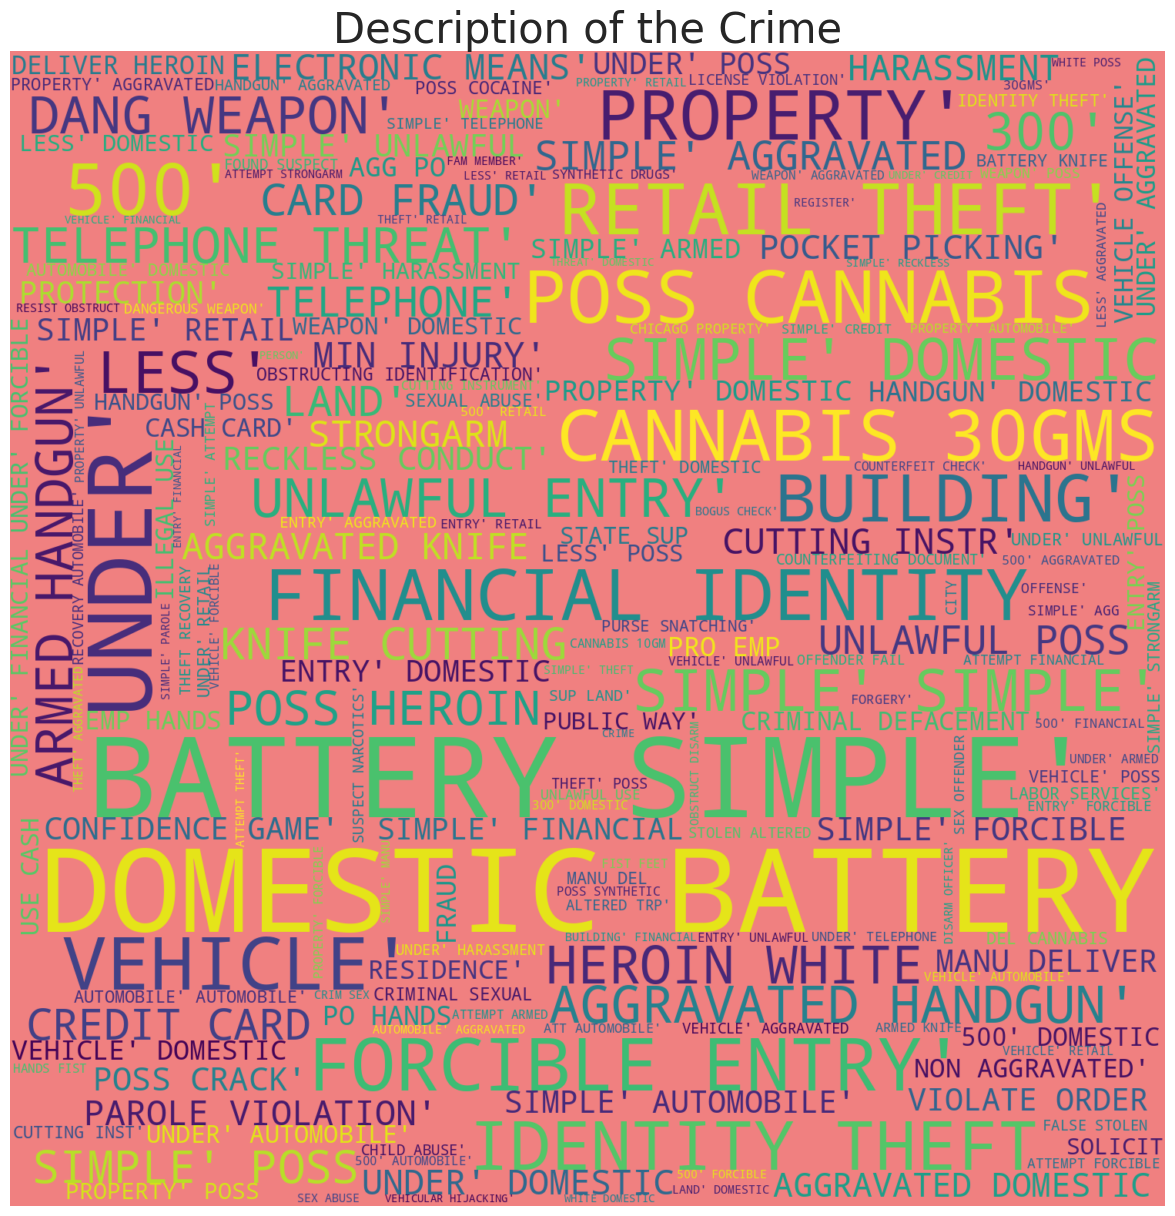

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fast')
# background_color = (100, 200, 255)
descriptions = str(df_filterted['Description'].tolist())
wc = WordCloud(background_color='lightcoral', width=1500, height=1500).generate(descriptions)

plt.title('Description of the Crime', fontsize=30)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
dfrf = df[['Latitude', 'Longitude', 'Arrest']].copy()
dfrf['weekday'] = df_filterted[['weekday']].copy()
dfrf['Year'] = df_filterted[['Year']].copy()
dfrf.dropna(inplace=True),

(None,)

In [ ]:
Xrf = dfrf[['Latitude', 'Longitude','weekday']].copy()
y= dfrf[['Arrest']].copy()


In [ ]:


# Split the dataset into training and testing sets
X_train_rf, X_test_rf, y_train, y_test = train_test_split(Xrf, y, test_size=0.3, random_state=42)


X_train_rf = X_train_rf.reset_index(drop=True)
X_test_rf = X_test_rf.reset_index(drop=True)


# Create a Random Forest classifier with 100 estimators (trees)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


# Train the classifier using the training data with the selected features
rf_classifier.fit(X_train_rf, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_rf)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


<ipython-input-226-b7ceaec5b59b>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train_rf, y_train)


Accuracy: 0.7238699120474534
Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.87      0.83     22088
        True       0.41      0.28      0.33      7246

    accuracy                           0.72     29334
   macro avg       0.60      0.57      0.58     29334
weighted avg       0.69      0.72      0.70     29334



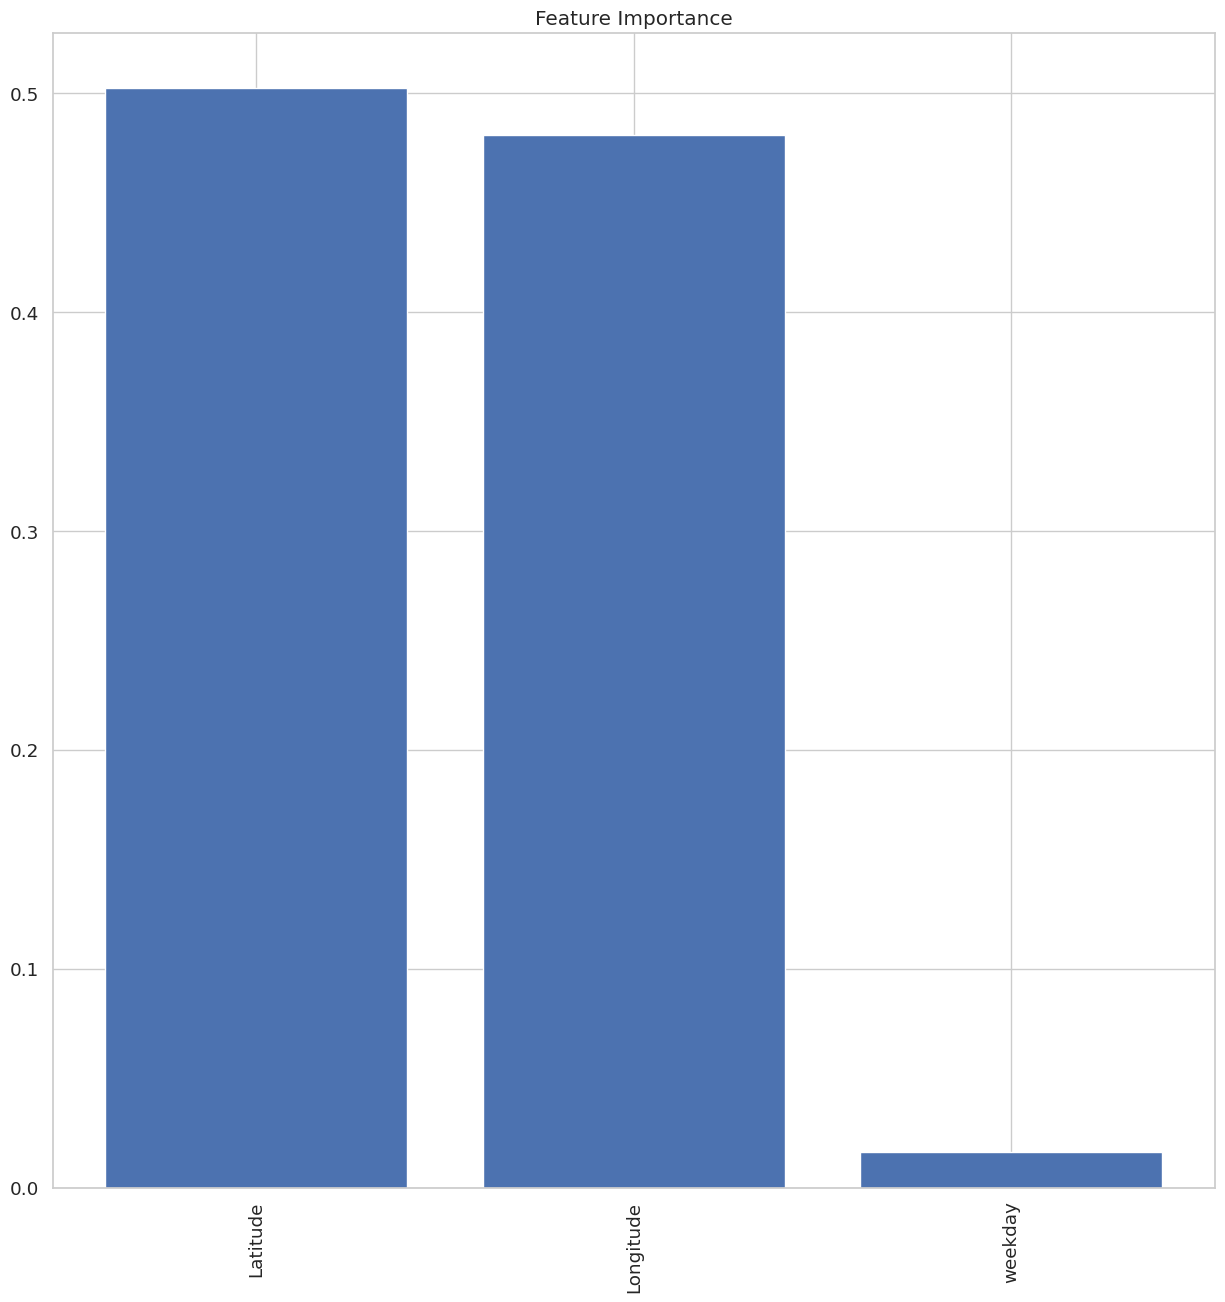

In [ ]:
# Get feature importances from the classifier
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [Xrf.columns[i] for i in indices]

# Create plot
plt.figure()

# Add title
plt.title("Feature Importance")

# Add bars
plt.bar(range(Xrf.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(Xrf.shape[1]), names, rotation=90)

# Show plot
plt.show()

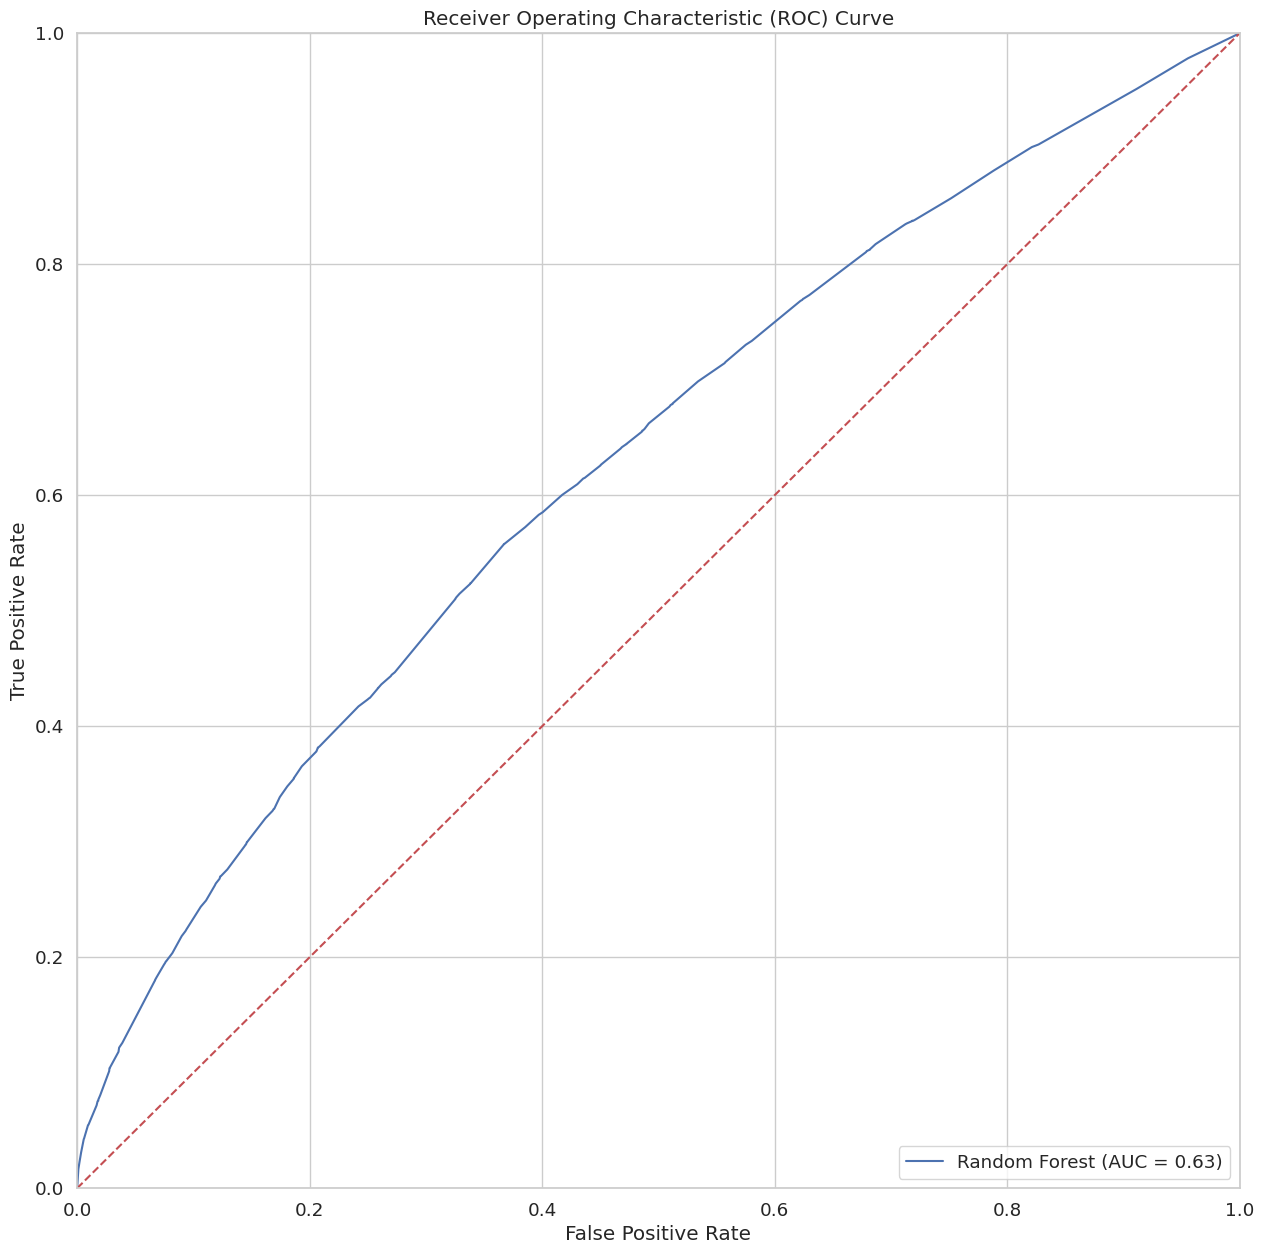

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities for X_test using rf_classifier
y_pred_proba = rf_classifier.predict_proba(X_test_rf)[:,1]

# Compute false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Next Steps :**
- In future , I would like implement more models which we discuss in class to compare which model gives us the better prediction
- Also , I would like to explore the data further by taking different target variables such as Primary Type, Description so that we can give more accuracy for our goal
- I will be providing more visualizations in further so that It will be easy to understand the data which makes easy to learn about the predictions even by a simple person


**References :**

*   https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python
*   https://www.geeksforgeeks.org/how-to-load-a-massive-file-as-small-chunks-in-pandas/
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://github.com/bcbarsness/machine-learning/blob/master/Logistic%20Regression%20with%20Python.ipynb
*  https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


